In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
df = pd.read_csv('dataset.csv', index_col = 'id')

# Information about the dataset

In [68]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
id,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [69]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

# Clean

## Remove null values

In [71]:
df.dropna(inplace=True)

## Check for duplicates and remove them

In [72]:
df.duplicated(keep=False).value_counts()

False    113105
True        894
dtype: int64

In [73]:
df = df.drop_duplicates()

## Remove entries where tempo is 0

In [74]:
df = df.drop(df[df['tempo'] == 0].index)

# Analysis

## Heatmap

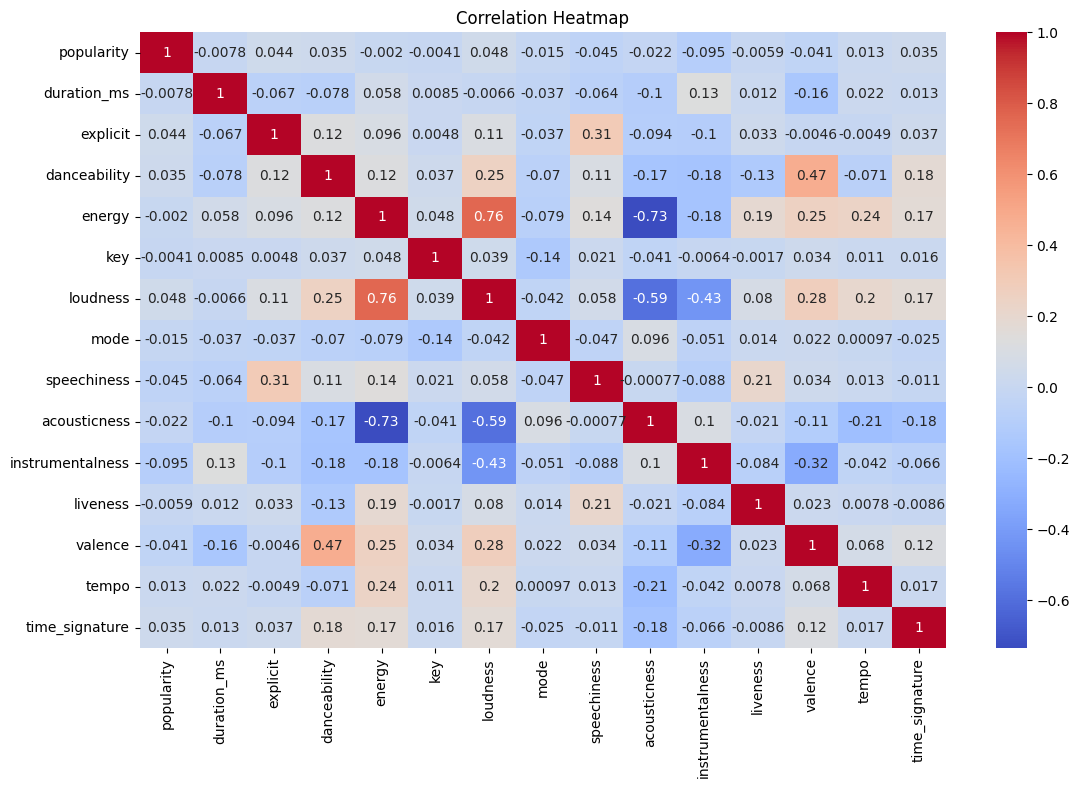

In [75]:
corr_matrix = df.corr()

plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Popularity by genre

In [76]:
df_genre = df.groupby(df['track_genre'], as_index=False)['popularity'].mean()
df_genre = df_genre.sort_values(by = 'popularity', ascending=False)
print(df_genre)

       track_genre  popularity
81        pop-film   59.280280
65           k-pop   56.963928
15           chill   53.704705
94             sad   52.379000
44          grunge   49.582583
..             ...         ...
13   chicago-house   12.333667
24  detroit-techno   11.183367
67           latin    8.363636
93         romance    3.524917
59         iranian    2.233740

[114 rows x 2 columns]


In [77]:
# Top 10 genres
df_genre_top = df_genre.iloc[:10]

[]

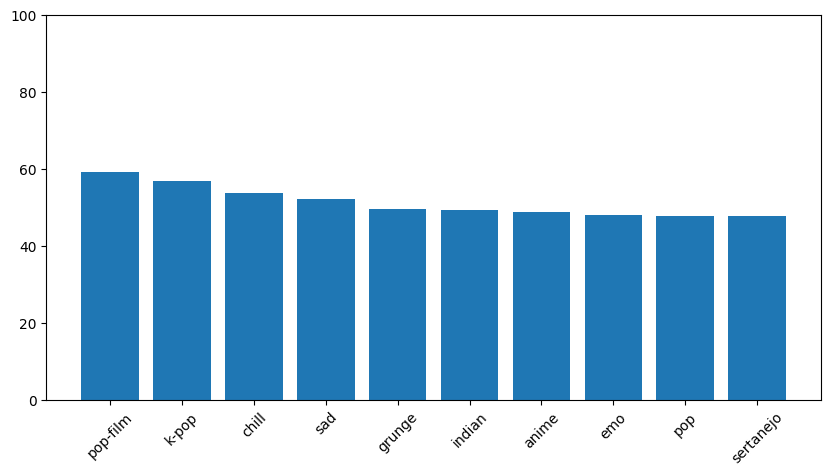

In [78]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.bar(df_genre_top['track_genre'], df_genre_top['popularity'])
ax.set_ylim(ymin=0, ymax=100)
plt.xticks(rotation=45)
plt.plot()

In [79]:
# Bottom 10 genres
df_genre_bot = df_genre.iloc[-10:]

[]

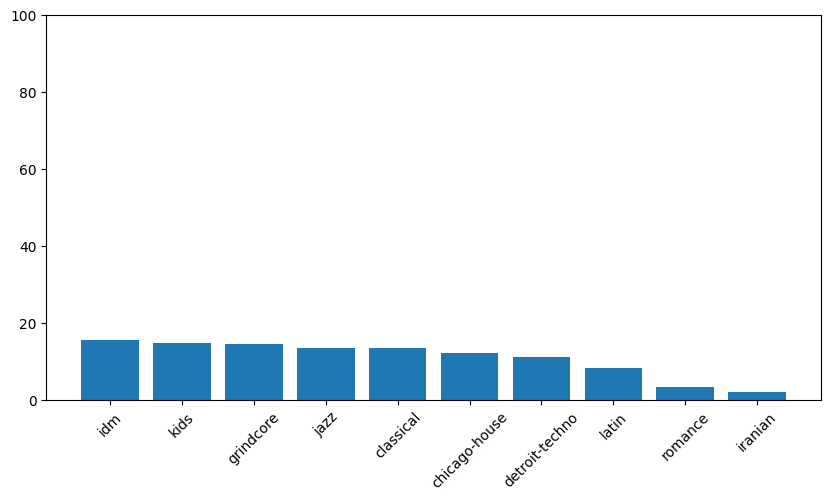

In [80]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.bar(df_genre_bot['track_genre'], df_genre_bot['popularity'])
ax.set_ylim(ymin=0, ymax=100)
plt.xticks(rotation=45)
plt.plot()

## Popular vs not popular

In [81]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Popular is anything with a popularity above 50 and not popular, below 50
df['is_popular'] = df['popularity'] >= 50

mean_values = df.groupby('is_popular')[features].mean().T

[]

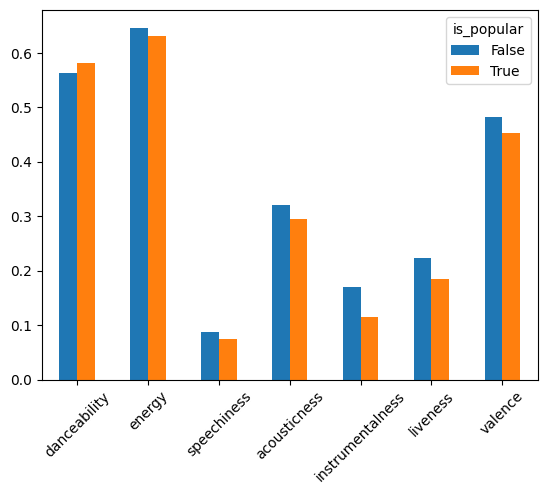

In [82]:
mean_values.plot(kind='bar')
plt.xticks(rotation=45)
plt.plot()

## Low tempo vs high tempo

In [83]:
df = df.sort_values(by='tempo')
low_tempo = df[:1000][features].mean().T
high_tempo = df[-1000:][features].mean().T

In [84]:
df_tempo = pd.concat([low_tempo, high_tempo], axis = 1)
df_tempo.columns = ['low', 'high']

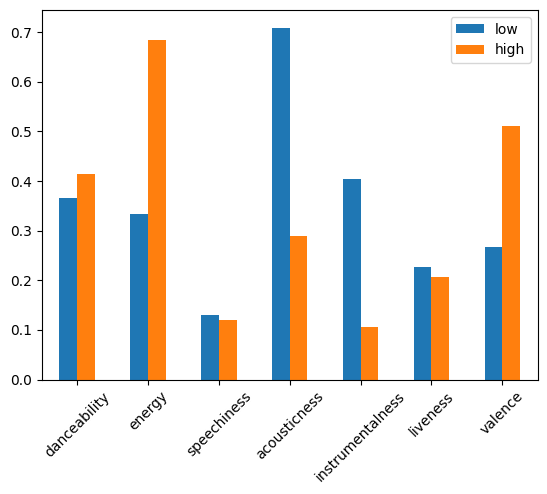

In [85]:
df_tempo.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## By key

In [106]:
key = df.groupby('key', as_index=False)['popularity'].mean()

[]

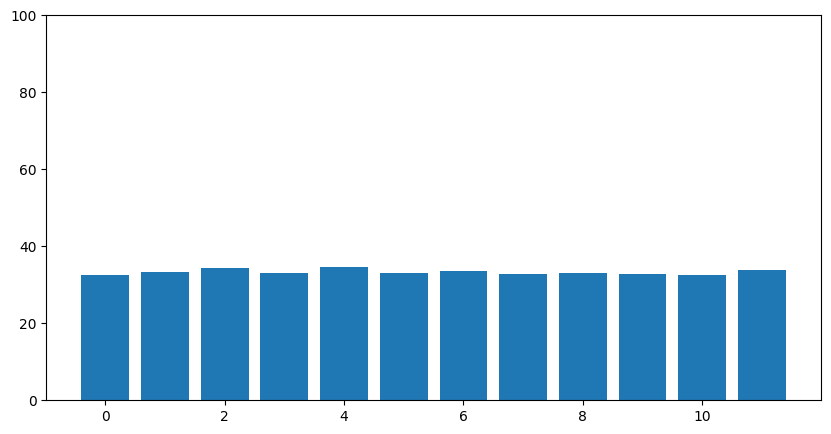

In [109]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.bar(key['key'], key['popularity'])
ax.set_ylim(ymin=0, ymax=100)
plt.plot()